# MA 506 Probability and Statistical Inference
# Lecture 18: t-test, p-value, F-test and $R^2$

The approaches we discuss here are used for model selection among multiple linear regression models. They dont have a hyperparameter such as $\lambda$ which we had in Ridge and Lasso Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## Getting some data 

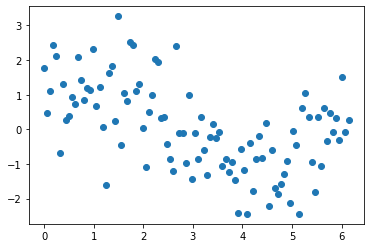

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
x = np.linspace(0,6.14,100)
y = np.sin(x)
err = np.random.randn(len(x))
y_noisy = y+err
plt.scatter(x,y_noisy)
plt.show()

## 1. t-statistic and p value

Suppose we are fitting the model:

$$y = \beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + \beta_4x^4 + \beta_5x^5 + \beta_6x^6 + \beta_7x^7$$

Here, one is often interested in null hypothesis that $\beta_i$ is zero versus the alternative that $\beta_i$ is non zero. Hence we have
$$
H_0: \hat{\beta}_i = 0
$$
$$
H_1: \hat{\beta}_i \neq 0
$$


This can be done by using the t-statistic:

$$
t(\hat{\beta_i}) = \frac{\hat{\beta}_i}{\widehat{st.dev}(\hat{\beta}_i)}
$$

The p-value is

$$
2[1 - F_t\{t(\hat{\beta}_i);n-p\}]
$$

Where $F_t(\cdot,k)$ is the cumulative distribution of the t-distribution with k degree of freedom.

Please note:
1. p-value represents the probability of $H_0$ 
2. If p-value < 0.05 is said to be statistically significant.
3. Hence if p-value < 0.05, we say the probability of $H_0$ is very small (it is less than 5%)
4. So $H_0$ can be rejected and we accept $H_1$.
5. If p-value > 0.05, we accept $H_0$ as it is.

In [3]:
## Fitting the Regression model

## Getting X
def poly_power(x,n):
    X = []
    for i in x:
        temp = []
        for j in range(n+1):
            temp.append(i**j)
                
        X.append(temp)
    return np.array(X)
X = poly_power(x,n = 7)

## Computing beta
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y_noisy))
pred = X.dot(beta)

## Computing sigma
e = y_noisy - pred
var = np.linalg.norm(e)**2/(len(y_noisy) - 8)
std = np.sqrt(var)

## Computing st.dev(beta)
std_beta = std*np.sqrt(np.diag(np.linalg.inv(X.T.dot(X))))

## Computing t-statistic
t = beta/std_beta

In [4]:
2*scipy.stats.t.sf(np.abs(t),len(y_noisy) - 8)

array([0.02271824, 0.45111643, 0.50200635, 0.57286793, 0.64803131,
       0.69953576, 0.72649027, 0.73692096])

### <mark style="background-color: #FFFF00">Exercise</mark> 

1. What do you infer looking at these p-values

In [5]:
## comparting it with confidence intervals of beta_i

In [6]:
import scipy.stats
confidence = 0.95
alpha = 0.05
stdev_t = std_beta*scipy.stats.t.ppf(1 - alpha/2.,len(y_noisy) - 8)

print('Interval for beta is: ')
for i in range(len(beta)):
    low = np.round(beta[i]-stdev_t[i],2)
    high = np.round(beta[i]+stdev_t[i],2)
    print(f'[{low},{high}]')

Interval for beta is: 
[0.22,2.83]
[-11.07,4.96]
[-10.29,20.86]
[-17.06,9.5]
[-4.43,7.09]
[-1.59,1.07]
[-0.13,0.18]
[-0.01,0.01]


### <mark style="background-color: #FFFF00">Exercise</mark>

1. How do these confidence intervals compare with the p-values found before

## 2. F- test

Asuuming we have to choose between two models:

$$
y = \beta_0 + \beta_1x + \beta_2x^2
$$
$$
\text{vs}
$$
$$
y = \beta_0 + \beta_1x
$$

Hence essetially we are choosing whether $\beta_2  = 0$ or not. Hence we have the following Null hypothesis and alternate hypothesis
$$
H_0: \beta_2 = 0 \text{  versus } H_1: \beta_2 \neq 0
$$

Let $RSS_{linear}$ be the sum of the square of residuals for the linear model. Similarly, $RSS_{quadratic}$ is the sum of square of residuals for the quadratic model. Using these two quantities we define the Extra Sum of Squares $(ExtraSS)$:

$$
ExtraSS = RSS_{linear} - RSS_{quadratic}
$$

Now this idea can be generalized to choose between a simpler and a larger model


$$
ExtraSS = RSS_{smaller} - RSS_{larger}
$$

The extra sum of squares can be used to test the larger versus smaller models. The null hypothesis is that the smaller model fits the data, while the alternative is that smaller does not fit but the larger does. Let $p_{smaller}$ and $p_{larger}$ be the number of parameters for the smaller and larger model respectively.
Addionally, let $\hat{\sigma}^2_{larger}$ be the estimate of $\sigma^2$ for the larger model. The F-statistic is then defined as

$$
F \equiv \frac{ExtraSS \Big /(p_{larger} - p_{smaller})}{\hat{\sigma}^2_{larger}}
$$

It can be shown,under the null hypothesis and normality assumption, F has a F-distribution with $p_{larger} - p_{smaller}$ and $n - p_{larger}$ degrees of freedom.

Please note:

1. Based on the definition of F-statistic: Null hypothesis should be rejected when F is large. Hence, a large F means the complex model is considerably better
2. An $\alpha$ level test is obtained by rejecting the Null hypothesis when F exceeds $(1-\alpha)$ quantile of F-distribution

Therefore the p-value is $F_F(F; p_{larger} - p_{smaller}, n - p_{larger})$, where, $F_F(\cdot, m_1, m_2)$ is the cumulative distribution of F-distribution with $m_1$ and $m_2$ degrees of freedom.

In [7]:
## deciding between straight line and quadratic model for the given data

In [8]:
## straight line model
X = poly_power(x,1)
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y_noisy))
pred_1 = X.dot(beta)
e1 = y_noisy - pred_1
sume1 = sum([i**2 for i in e1])
p1 = 2

## quadratic model
X = poly_power(x,2)
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y_noisy))
pred_2 = X.dot(beta)
e2 = y_noisy - pred_2
sume2 = sum([i**2 for i in e2])
p2= 3

H = X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)
hii = np.diag(H)
e = y_noisy - pred_2
var = np.linalg.norm(e)**2/(len(y_noisy) - p2)

nr = (sume1 - sume2)/(p2-p1)
dr = var
F = nr/dr
F

10.893518833689285

In [9]:
## Computing the p-value

In [10]:
from scipy.stats import f
1 - f.cdf(F,p2-p1,len(y_noisy) - p2)

0.0013510282745001767

In [11]:
1 - f.cdf(F,p2-p1,len(y_noisy) - p2) < 0.05

True

Hence we can reject the Null hypothesis and conclude that the quadratic model is a better model.

## $R^2$ value

In [12]:
def R2(ytrue,ypred):
    ybar = np.mean(ytrue)
    ebar = ytrue - ybar
    sum_ebar = sum([i**2 for i in ebar])
    
    epred = ytrue - ypred
    sum_epred = sum([i**2 for i in epred])
    
    r2 = 1 - sum_epred/sum_ebar
    return r2

In [13]:
R2(y_noisy,pred_1)

0.263822362330837

In [14]:
R2(y_noisy,pred_2)

0.33815087666218935

In [15]:
R2(y_noisy,pred)

0.47630562282208566

### <mark style="background-color: #FFFF00">Exercise</mark>

1. Comment on which model is a better model based on $R^2$